In [0]:
import os
path = "(...)/ps1/src"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import util
from linear_model import LinearModel

In [0]:
class LocallyWeightedLinearRegression(LinearModel):
    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.X = None
        self.y = None

    def fit(self, X, y):
        """Fit LWR by saving the training set"""
        self.X = X
        self.y = y

    def predict(self, X):
        """Make predictions given inputs x"""
        from numpy.linalg import inv, norm
        
        m, n = X.shape
        g = lambda X: np.exp(-(X**2)/(2*self.tau**2))
        
        # Compute w for each x
        w = g(norm(self.X[None]-X[:,None], axis=2))
        y_pred = np.zeros(m)  
        for i, W in enumerate(w):
            W = np.diag(W)
            theta = inv(self.X.T.dot(W).dot(self.X)).dot(self.X.T).dot(W).dot(self.y)           
            # make prediction
            y_pred[i] = X[i].dot(theta)
        return (y_pred)

In [54]:
# Load training set
train_path = "(...)/ps1/data/ds5_train.csv"
eval_path = "(...)/ps1/data/ds5_valid.csv"
X_train, y_train = util.load_dataset(train_path, add_intercept=True)

# Fit a LWR model
tau = 10
model = LocallyWeightedLinearRegression(tau)
model.fit(X_train, y_train)

# Get MSE value on the validation set
X_val, y_val = util.load_dataset(eval_path, add_intercept=True)
y_pred = model.predict(X_val)

mse = ((y_pred - y_val)** 2).mean()
print(mse)

0.4337439227232362


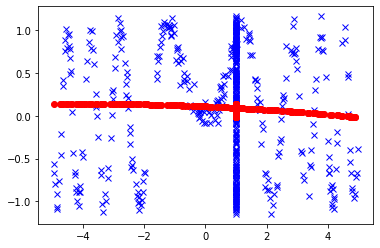

In [56]:
#plot    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X_train, y_train, 'bx')
plt.plot(X_val, y_pred, 'ro')
plt.show()